In [2]:
#%run "pokemon_dataCleaning.ipynb"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = "../data/pokemon_cleaned.csv"
pokemon = pd.read_csv(path, index_col = 0)
pokemon.head()

,pokedex_number,name,type1,type2,generation,hp,attack,defense,sp_attack,sp_defense,...,percentage_male,weight_kg,is_legendary,percentage_female,ability_0,ability_1,ability_2,ability_3,ability_4,ability_5
0,1,Bulbasaur,grass,poison,1,45,49,49,65,65,...,88.1,6.9,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
1,2,Ivysaur,grass,poison,1,60,62,63,80,80,...,88.1,13.0,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
2,3,Venusaur,grass,poison,1,80,100,123,122,120,...,88.1,100.0,0,11.9,Overgrow,Chlorophyll,NaN,NaN,NaN,NaN
3,4,Charmander,fire,none,1,39,52,43,60,50,...,88.1,8.5,0,11.9,Blaze,Solar Power,NaN,NaN,NaN,NaN
4,5,Charmeleon,fire,none,1,58,64,58,80,65,...,88.1,19.0,0,11.9,Blaze,Solar Power,NaN,NaN,NaN,NaN


## 1. Data Preparation

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(pokemon, test_size = 0.2, random_state = 1234)

In [5]:
corr_matrix = train.select_dtypes(include = "number").corr()
corr_matrix

,pokedex_number,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_egg_steps,base_happiness,capture_rate,experience_growth,height_m,percentage_male,weight_kg,is_legendary,percentage_female
pokedex_number,1.000000,0.985871,0.154929,0.131391,0.091983,0.124700,0.096014,0.016147,0.202018,-0.179667,-0.121419,0.093123,0.037510,-0.143774,0.140584,0.203609,-0.090750
generation,0.985871,1.000000,0.117142,0.092856,0.042197,0.083081,0.047110,-0.010026,0.132993,-0.141886,-0.076527,0.061021,-0.003302,-0.091872,0.099881,0.144448,-0.070753
hp,0.154929,0.117142,1.000000,0.460650,0.273143,0.382047,0.365866,0.203420,0.399078,-0.179561,-0.477240,0.238115,0.513327,-0.221372,0.477380,0.358611,-0.115177
attack,0.131391,0.092856,0.460650,1.000000,0.421405,0.361610,0.259169,0.348255,0.320379,-0.238313,-0.501986,0.228113,0.460817,-0.021091,0.343328,0.292993,-0.273242
defense,0.091983,0.042197,0.273143,0.421405,1.000000,0.219917,0.548294,-0.019925,0.253973,-0.205218,-0.450206,0.103977,0.372903,-0.137591,0.392491,0.252255,-0.197522
sp_attack,0.124700,0.083081,0.382047,0.361610,0.219917,1.000000,0.486643,0.450833,0.414168,-0.230687,-0.505350,0.204977,0.389437,-0.181357,0.219611,0.405986,-0.276281
sp_defense,0.096014,0.047110,0.365866,0.259169,0.548294,0.486643,1.000000,0.205933,0.346417,-0.195992,-0.500945,0.095343,0.377823,-0.219507,0.322099,0.351376,-0.212016
speed,0.016147,-0.010026,0.203420,0.348255,-0.019925,0.450833,0.205933,1.000000,0.307973,-0.164326,-0.388898,0.162022,0.254849,-0.128048,0.050349,0.327878,-0.177635
base_egg_steps,0.202018,0.132993,0.399078,0.320379,0.253973,0.414168,0.346417,0.307973,1.000000,-0.538446,-0.375881,0.380110,0.436227,-0.447411,0.469422,0.886439,-0.467755
base_happiness,-0.179667,-0.141886,-0.179561,-0.238313,-0.205218,-0.230687,-0.195992,-0.164326,-0.538446,1.000000,0.196522,-0.306850,-0.438941,0.282457,-0.459177,-0.446852,0.313003


Our objective is to construct a ML model to predict whether a pokemon is legendary.

In [6]:
corr_matrix['is_legendary'].sort_values(ascending = False)

is_legendary         1.000000
base_egg_steps       0.886439
weight_kg            0.416305
sp_attack            0.405986
height_m             0.389016
experience_growth    0.373834
hp                   0.358611
sp_defense           0.351376
speed                0.327878
attack               0.292993
defense              0.252255
pokedex_number       0.203609
generation           0.144448
capture_rate        -0.350442
base_happiness      -0.446852
percentage_female   -0.477378
percentage_male     -0.513898
Name: is_legendary, dtype: float64

Let's separate predictors and targets

In [7]:
trainX = train.drop('is_legendary', axis = 1)
trainY = train['is_legendary'].copy()

We handle missing values by imputing NaN using the mean for numerical attributes. Then:

In [8]:
#num_mask = trainX.dtypes.map(lambda x: str(x).startswith('int')|str(x).startswith('float'))
#trainX_num = trainX.loc[:, num_mask]

trainX_num = trainX.select_dtypes(include = "number")
trainX_num.columns

Index(['pokedex_number', 'generation', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'base_egg_steps', 'base_happiness',
       'capture_rate', 'experience_growth', 'height_m', 'percentage_male',
       'weight_kg', 'percentage_female'],
      dtype='object')

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
#Preview:
imputer = SimpleImputer(strategy = "mean")
imputer.fit(trainX_num)
print(imputer.statistics_)

temp = imputer.transform(trainX_num)
temp = pd.DataFrame(temp, columns = trainX_num.columns)
temp.isna().sum().sum()

[4.07369735e+02 3.74102964e+00 6.88736349e+01 7.86411856e+01
 7.37613105e+01 7.20795632e+01 7.14695788e+01 6.67722309e+01
 7.45235569e+03 6.53744150e+01 9.62012480e+01 1.05333523e+06
 1.16961415e+00 4.84198128e+01 6.09448553e+01 3.84756630e+01]


np.int64(0)

We look to one-hot encode categorical attributes:

In [11]:
# trainX.columns[np.invert(num_mask)]
trainX_str = trainX.select_dtypes(include = "object")
trainX_str.columns

Index(['name', 'type1', 'type2', 'classification', 'ability_0', 'ability_1',
       'ability_2', 'ability_3', 'ability_4', 'ability_5'],
      dtype='object')

Number of unique values for each categorical column:

In [12]:
for c in trainX_str.columns:
    print(c, ":", len(trainX_str[c].unique()))

name : 641
type1 : 18
type2 : 19
classification : 494
ability_0 : 160
ability_1 : 146
ability_2 : 112
ability_3 : 13
ability_4 : 7
ability_5 : 7


Hence, before applying a ML algorithm, we one-hot encode `type1` and `type2`, and remove all other categorical fields.

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
trainX_cat = trainX.loc[:, ["type1", "type2"]]

In [15]:
#Preview:
encoder = OneHotEncoder()
encoder.fit(trainX_cat)
print(encoder.categories_)

temp = encoder.transform(trainX_cat)
temp.toarray()

[array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
       'psychic', 'rock', 'steel', 'water'], dtype=object), array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
       'flying', 'ghost', 'grass', 'ground', 'ice', 'none', 'normal',
       'poison', 'psychic', 'rock', 'steel', 'water'], dtype=object)]


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(641, 37))

Create a custom transformer to add a new feature: number of abilities.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

In [35]:
class CategoricalCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, remove = False, names = False):
        self.remove = remove
        self.names = names
    def fit(self, X):
        return self
    def transform(self, X):
        if self.remove == True:
            cat_mask1 = X.dtypes.map(lambda x: (str(x) == "object"))
            cat_mask2 = X.columns.map(lambda x: (str(x).startswith("type") == False))                            
            X_new = X.loc[:, np.invert(cat_mask1 & cat_mask2)].copy()
        else:
            X_new = X.copy()
        abilities_mask = X.columns.str.startswith("ability")
        X_new["abilities_num"] = X.loc[:, abilities_mask].notna().sum(axis = 1)
        if self.names == True:
            return X_new.values, X_new.columns
        else:
            return X_new.values

In [36]:
CatClean = CategoricalCleaner(remove = True, names = True)
temp, cols = CatClean.transform(trainX)
temp = pd.DataFrame(temp, columns = cols)
temp.head()

,pokedex_number,type1,type2,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_egg_steps,base_happiness,capture_rate,experience_growth,height_m,percentage_male,weight_kg,percentage_female,abilities_num
0,148,dragon,none,1,61,84,65,70,70,70,10240,35,45,1250000,4.0,50.0,16.5,50.0,2
1,654,fire,none,6,59,59,58,90,70,73,5120,70,45,1059860,1.0,88.1,14.5,11.9,2
2,788,water,fairy,7,70,75,115,95,130,85,3840,70,3,1250000,1.3,0.0,21.2,0.0,2
3,330,ground,dragon,3,80,100,80,80,80,100,5120,70,45,1059860,2.0,50.0,82.0,50.0,1
4,370,water,none,3,43,30,55,40,65,97,5120,70,225,800000,0.6,24.6,8.7,75.4,2


We also scale numerical attributes.

In [37]:
from sklearn.preprocessing import MinMaxScaler

Building the transformation pipeline:

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", MinMaxScaler())
])

In [40]:
pd.DataFrame(num_pipeline.fit_transform(trainX_num), columns = trainX_num.columns).head()

,pokedex_number,generation,hp,attack,defense,sp_attack,sp_defense,speed,base_egg_steps,base_happiness,capture_rate,experience_growth,height_m,percentage_male,weight_kg,percentage_female
0,0.18375,0.000000,0.240964,0.438889,0.266667,0.326087,0.238095,0.371429,0.304348,0.25,0.166667,0.625000,0.428571,0.500,0.016403,0.500
1,0.81625,0.833333,0.232932,0.300000,0.235556,0.434783,0.238095,0.388571,0.130435,0.50,0.166667,0.442173,0.098901,0.881,0.014403,0.119
2,0.98375,1.000000,0.277108,0.388889,0.488889,0.461957,0.523810,0.457143,0.086957,0.50,0.000000,0.625000,0.131868,0.000,0.021104,0.000
3,0.41125,0.333333,0.317269,0.527778,0.333333,0.380435,0.285714,0.542857,0.130435,0.50,0.166667,0.442173,0.208791,0.500,0.081916,0.500
4,0.46125,0.333333,0.168675,0.138889,0.222222,0.163043,0.214286,0.525714,0.130435,0.50,0.880952,0.192308,0.054945,0.246,0.008602,0.754


In [41]:
from sklearn.compose import ColumnTransformer

In [42]:
all_attrs = list(trainX)

num_attrs_aug = list(trainX_num) + ["abilities_num"]
num_attrs = list(trainX_num)

cat_type_attrs = ["type1", "type2"]
cat_other_attrs = [a for a in all_attrs if (a not in num_attrs_aug and a not in cat_type_attrs)]

In [43]:
full_pipeline = ColumnTransformer([
    ("augment", CategoricalCleaner(remove = True), cat_other_attrs),
    ("types", OneHotEncoder(sparse_output = False), cat_type_attrs),
    ("num", num_pipeline, num_attrs)
])

Our final data set is:

In [44]:
trainX_prep = full_pipeline.fit_transform(trainX)

In [45]:
full_pipeline.transformers_[1][1].categories_

[array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
        'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison',
        'psychic', 'rock', 'steel', 'water'], dtype=object),
 array(['bug', 'dark', 'dragon', 'electric', 'fairy', 'fighting', 'fire',
        'flying', 'ghost', 'grass', 'ground', 'ice', 'none', 'normal',
        'poison', 'psychic', 'rock', 'steel', 'water'], dtype=object)]

In [46]:
pd.DataFrame(trainX_prep).head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238095,0.371429,0.304348,0.25,0.166667,0.625000,0.428571,0.500,0.016403,0.500
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.238095,0.388571,0.130435,0.50,0.166667,0.442173,0.098901,0.881,0.014403,0.119
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.523810,0.457143,0.086957,0.50,0.000000,0.625000,0.131868,0.000,0.021104,0.000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.542857,0.130435,0.50,0.166667,0.442173,0.208791,0.500,0.081916,0.500
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.214286,0.525714,0.130435,0.50,0.880952,0.192308,0.054945,0.246,0.008602,0.754


## 3. Model Selection and Evaluation

## 3.1 Classifying Legendary Pokemon

### Linear probability model

First, we use a linear probability model.

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(trainX_prep, trainY)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now the model is trained.

In [50]:
np.random.seed(1234)

In [51]:
sample = np.random.choice(np.arange(0, len(trainX)), 
                          size = 20,
                          replace = False)

In [52]:
pd.DataFrame({"Predictions": lin_reg.predict(pd.DataFrame(trainX_prep).iloc[sample]),
              "Labels": trainY.iloc[sample]})

,Predictions,Labels
224,-0.007355,0
243,0.694765,1
771,0.933417,0
32,-0.037075,0
555,0.020850,0
435,0.083505,0
498,0.056326,0
25,-0.028493,0
564,0.061404,0
642,0.855354,1


In [53]:
isleg_pred = (lin_reg.predict(trainX_prep) > 0.5).astype(int)

In [54]:
np.unique(isleg_pred, return_counts = True)

(array([0, 1]), array([582,  59]))

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(trainY, isleg_pred)

array([[577,   2],
       [  5,  57]])

In [57]:
(isleg_pred != trainY).mean()

np.float64(0.0109204368174727)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(trainY, isleg_pred)

0.9890795631825273

The model predicts very well on the training data: just 1% of misclassifications.

Test error:

In [60]:
testX = test.drop("is_legendary", axis = 1)
testY = test["is_legendary"].copy()

In [61]:
preds = (lin_reg.predict(full_pipeline.transform(testX)) > 0.5).astype(int)

In [62]:
confusion_matrix(testY, preds)

array([[153,   0],
       [  2,   6]])

In [63]:
(preds != testY).mean()

np.float64(0.012422360248447204)

In [64]:
accuracy_score(testY, preds)

0.9875776397515528

The model seems not to have overfitted. No errors on non legendary, but here there is a 33% error on legendary, insted of <10%. This may be just due to low number of legendaries.

### Decision Tree

We now use a decision tree.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(trainX_prep, trainY)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
confusion_matrix(trainY, tree_reg.predict(trainX_prep))

array([[579,   0],
       [  0,  62]])

In [68]:
accuracy_score(trainY, tree_reg.predict(trainX_prep))

1.0

The decision tree makes no error on the training data! Maybe this is really a perfect model, or maybe it has overfitted.

In [69]:
confusion_matrix(testY, tree_reg.predict(full_pipeline.transform(testX)))

array([[152,   1],
       [  0,   8]])

In [70]:
accuracy_score(testY, tree_reg.predict(full_pipeline.transform(testX)))

0.9937888198757764

The model has fared better on the legendaries, classifying all of them correctly, with just a slightly worse result on the non-legendaries.

### Cross Validation for both LR and Decision tree models

In [71]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(tree_reg, trainX_prep, trainY, scoring = "accuracy", cv = 10, error_score = "raise")

In [73]:
scores.mean(), scores.std()

(np.float64(0.9984375), np.float64(0.0046875))

The CV estimate of the test accuracy is very high.

In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [ ]:
scores = cross_val_predict(lin_reg, trainX_prep, trainY, cv = 10, method = "predict")

In [76]:
p, r, t = precision_recall_curve(trainY, scores)

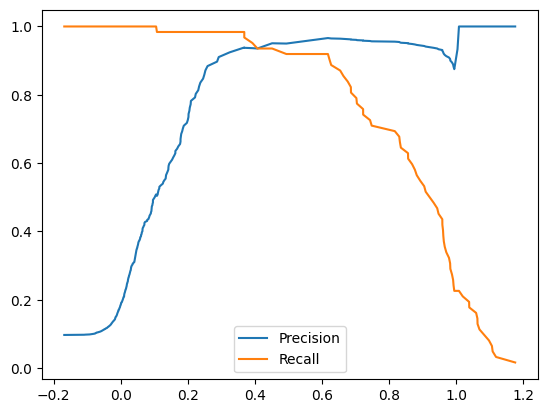

In [ ]:
plt.plot(t, p[:-1], label = "Precision")
plt.plot(t, r[:-1], label = "Recall")
plt.legend(loc = "best")
plt.show()

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
y_lin_pred = cross_val_predict(lin_reg, trainX_prep, trainY, cv = 10, method = "predict") > 0.5
print(precision_score(trainY, y_lin_pred))
print(recall_score(trainY, y_lin_pred))
print(f1_score(trainY, y_lin_pred))

0.9661016949152542
0.9193548387096774
0.9421487603305785


In [ ]:
y_lin_pred = cross_val_predict(lin_reg, trainX_prep, trainY, cv = 10, method = "predict") > 0.4
print(precision_score(trainY, y_lin_pred))
print(recall_score(trainY, y_lin_pred))
print(f1_score(trainY, y_lin_pred))

0.9354838709677419
0.9354838709677419
0.9354838709677419


In [ ]:
ts = np.linspace(0, 1, 100)
best_f1 = 0
best_threshold = None
for t in ts:
    y_lin_pred = cross_val_predict(lin_reg, trainX_prep, trainY, cv = 10, method = "predict") > t
    f1 = f1_score(trainY, y_lin_pred)
    if f1 >= best_f1:
        best_f1 = f1
        best_threshold = t
print(best_threshold, best_f1)

0.36363636363636365 0.9606299212598425


In [ ]:
y_lin_pred = cross_val_predict(lin_reg, trainX_prep, trainY, cv = 10, method = "predict") > best_threshold
print(precision_score(trainY, y_lin_pred))
print(recall_score(trainY, y_lin_pred))
print(f1_score(trainY, y_lin_pred))

0.9384615384615385
0.9838709677419355
0.9606299212598425


## 3.2 Predicting the Attack Stat

Now, we predict attack. With our pipeline, it's very easy to redo all preparations.

In [ ]:
trainXa = train.drop("attack", axis = 1)
trainYa = train["attack"].copy()

testXa = test.drop("attack", axis = 1)
testYa = test["attack"].copy()

In [ ]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'mean')),
    ("scaler", MinMaxScaler())
])

In [ ]:
all_attrs = list(trainXa)

num_mask = trainXa.dtypes.map(lambda x: str(x).startswith("int")|str(x).startswith("float"))
trainXa_num = trainXa.loc[:, num_mask]
num_attrs_aug = list(trainXa_num) + ["abilities_num"]
num_attrs = list(trainXa_num)

cat_type_attrs = ["type1", "type2"]
cat_other_attrs = [a for a in all_attrs if (a not in num_attrs_aug and a not in cat_type_attrs)]

In [ ]:
full_pipeline_a = ColumnTransformer([
    ("augment", CategoricalCleaner(remove = True), cat_other_attrs),
    ("types", OneHotEncoder(sparse_output = False), cat_type_attrs),
    ("num", num_pipeline, num_attrs)
])

In [90]:
trainXa_prep = full_pipeline_a.fit_transform(trainXa)

In [91]:
lin_reg = LinearRegression()
lin_reg.fit(trainXa_prep, trainYa)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
np.random.seed(1234)

In [95]:
sample = np.random.choice(np.arange(0, len(trainXa_prep)),
                          size = 20, replace = False)
sample

array([393, 595, 363, 446, 300, 364, 160, 268, 220, 176, 565, 378, 402,
       221, 148, 146,  58, 321, 206, 629])

In [96]:
pd.DataFrame({"Predictions":lin_reg.predict(pd.DataFrame(trainXa_prep).iloc[sample]),
              "Labels":trainYa.iloc[sample]})

,Predictions,Labels
224,60.572789,55
243,112.637102,115
771,93.430073,95
32,73.137173,72
555,69.379767,86
435,33.263789,24
498,105.093904,93
25,65.576014,85
564,94.445844,108
642,113.728046,120


We look at the RMSE on the training set.

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
attack_pred = lin_reg.predict(trainXa_prep)

In [99]:
lin_rmse = np.sqrt(mean_squared_error(trainYa, attack_pred))

In [100]:
lin_rmse

np.float64(21.271055975576978)

Hence, on average the model is off by 21 attack points on the training data, which means it is quite good. Let's compute the CV error.

In [ ]:
scores = cross_val_score(lin_reg, trainXa_prep, trainYa, 
                         scoring = "neg_mean_squared_error", cv = 10)
np.sqrt(-scores).mean(), np.sqrt(-scores).std()

(np.float64(23.605137745740087), np.float64(3.1024377943222246))

Reasonably, being a simple model, it does not suffer from overfitting.

Let's see if we can do better.

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(trainXa_prep, trainYa)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [104]:
np.sqrt(mean_squared_error(trainYa, tree_reg.predict(trainXa_prep)))

np.float64(0.0)

The model makes perfect predictions on the training data. This smells overfitting.

In [ ]:
scores = cross_val_score(tree_reg, trainXa_prep, trainYa, 
                        scoring = "neg_mean_squared_error", cv = 10)
np.sqrt(-scores).mean(), np.sqrt(-scores).std()

(np.float64(31.97594887632828), np.float64(3.202225217416046))

Indeed, the model actually performs worse than the simpler linear regression model.

Let's use a last model: random forests.

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rf_reg = RandomForestRegressor()
rf_reg.fit(trainXa_prep, trainYa)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
np.sqrt(mean_squared_error(trainYa, rf_reg.predict(trainXa_prep)))

np.float64(8.517997190128984)

In [ ]:
scores = cross_val_score(rf_reg, trainXa_prep, trainYa, scoring = "neg_mean_squared_error", cv = 10)
np.sqrt(-scores).mean(), np.sqrt(-scores).std()

(np.float64(22.55211983710173), np.float64(2.3248932910009197))

The model is similar to the linear regression one.

We end with the evaluation on the test set.

In [110]:
np.sqrt(mean_squared_error(
    testYa,
    rf_reg.predict(
        full_pipeline_a.transform(testXa)))
)

np.float64(21.69571981716885)

In [ ]:
pd.DataFrame({"Real": testYa, "Predictions":rf_reg.predict(full_pipeline_a.transform(testXa))})

,Real,Predictions
192,65,74.41
65,80,70.74
606,30,47.27
60,65,80.15
537,100,110.47
...,...,...
645,120,133.23
96,73,79.04
484,90,115.89
42,50,47.47
